In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [118]:
# 1. LOAD DATA
df = pd.read_csv("Davos_combined_cleaned.csv")
print("Daten erfolgreich geladen.")

Daten erfolgreich geladen.


In [119]:
# 2. FILTER DATA FOR HOLIDAY APARTMENTS AND HOTELS
df_analysis = df[df['type'].isin(['ferienwohnung','hotel'])].copy()

num_rows = len(df_analysis)
print(f"\nNumber of filtered entries (Holiday Apartments/Hotels): {num_rows}")


Number of filtered entries (Holiday Apartments/Hotels): 81


# CREATE SCATTER PLOT

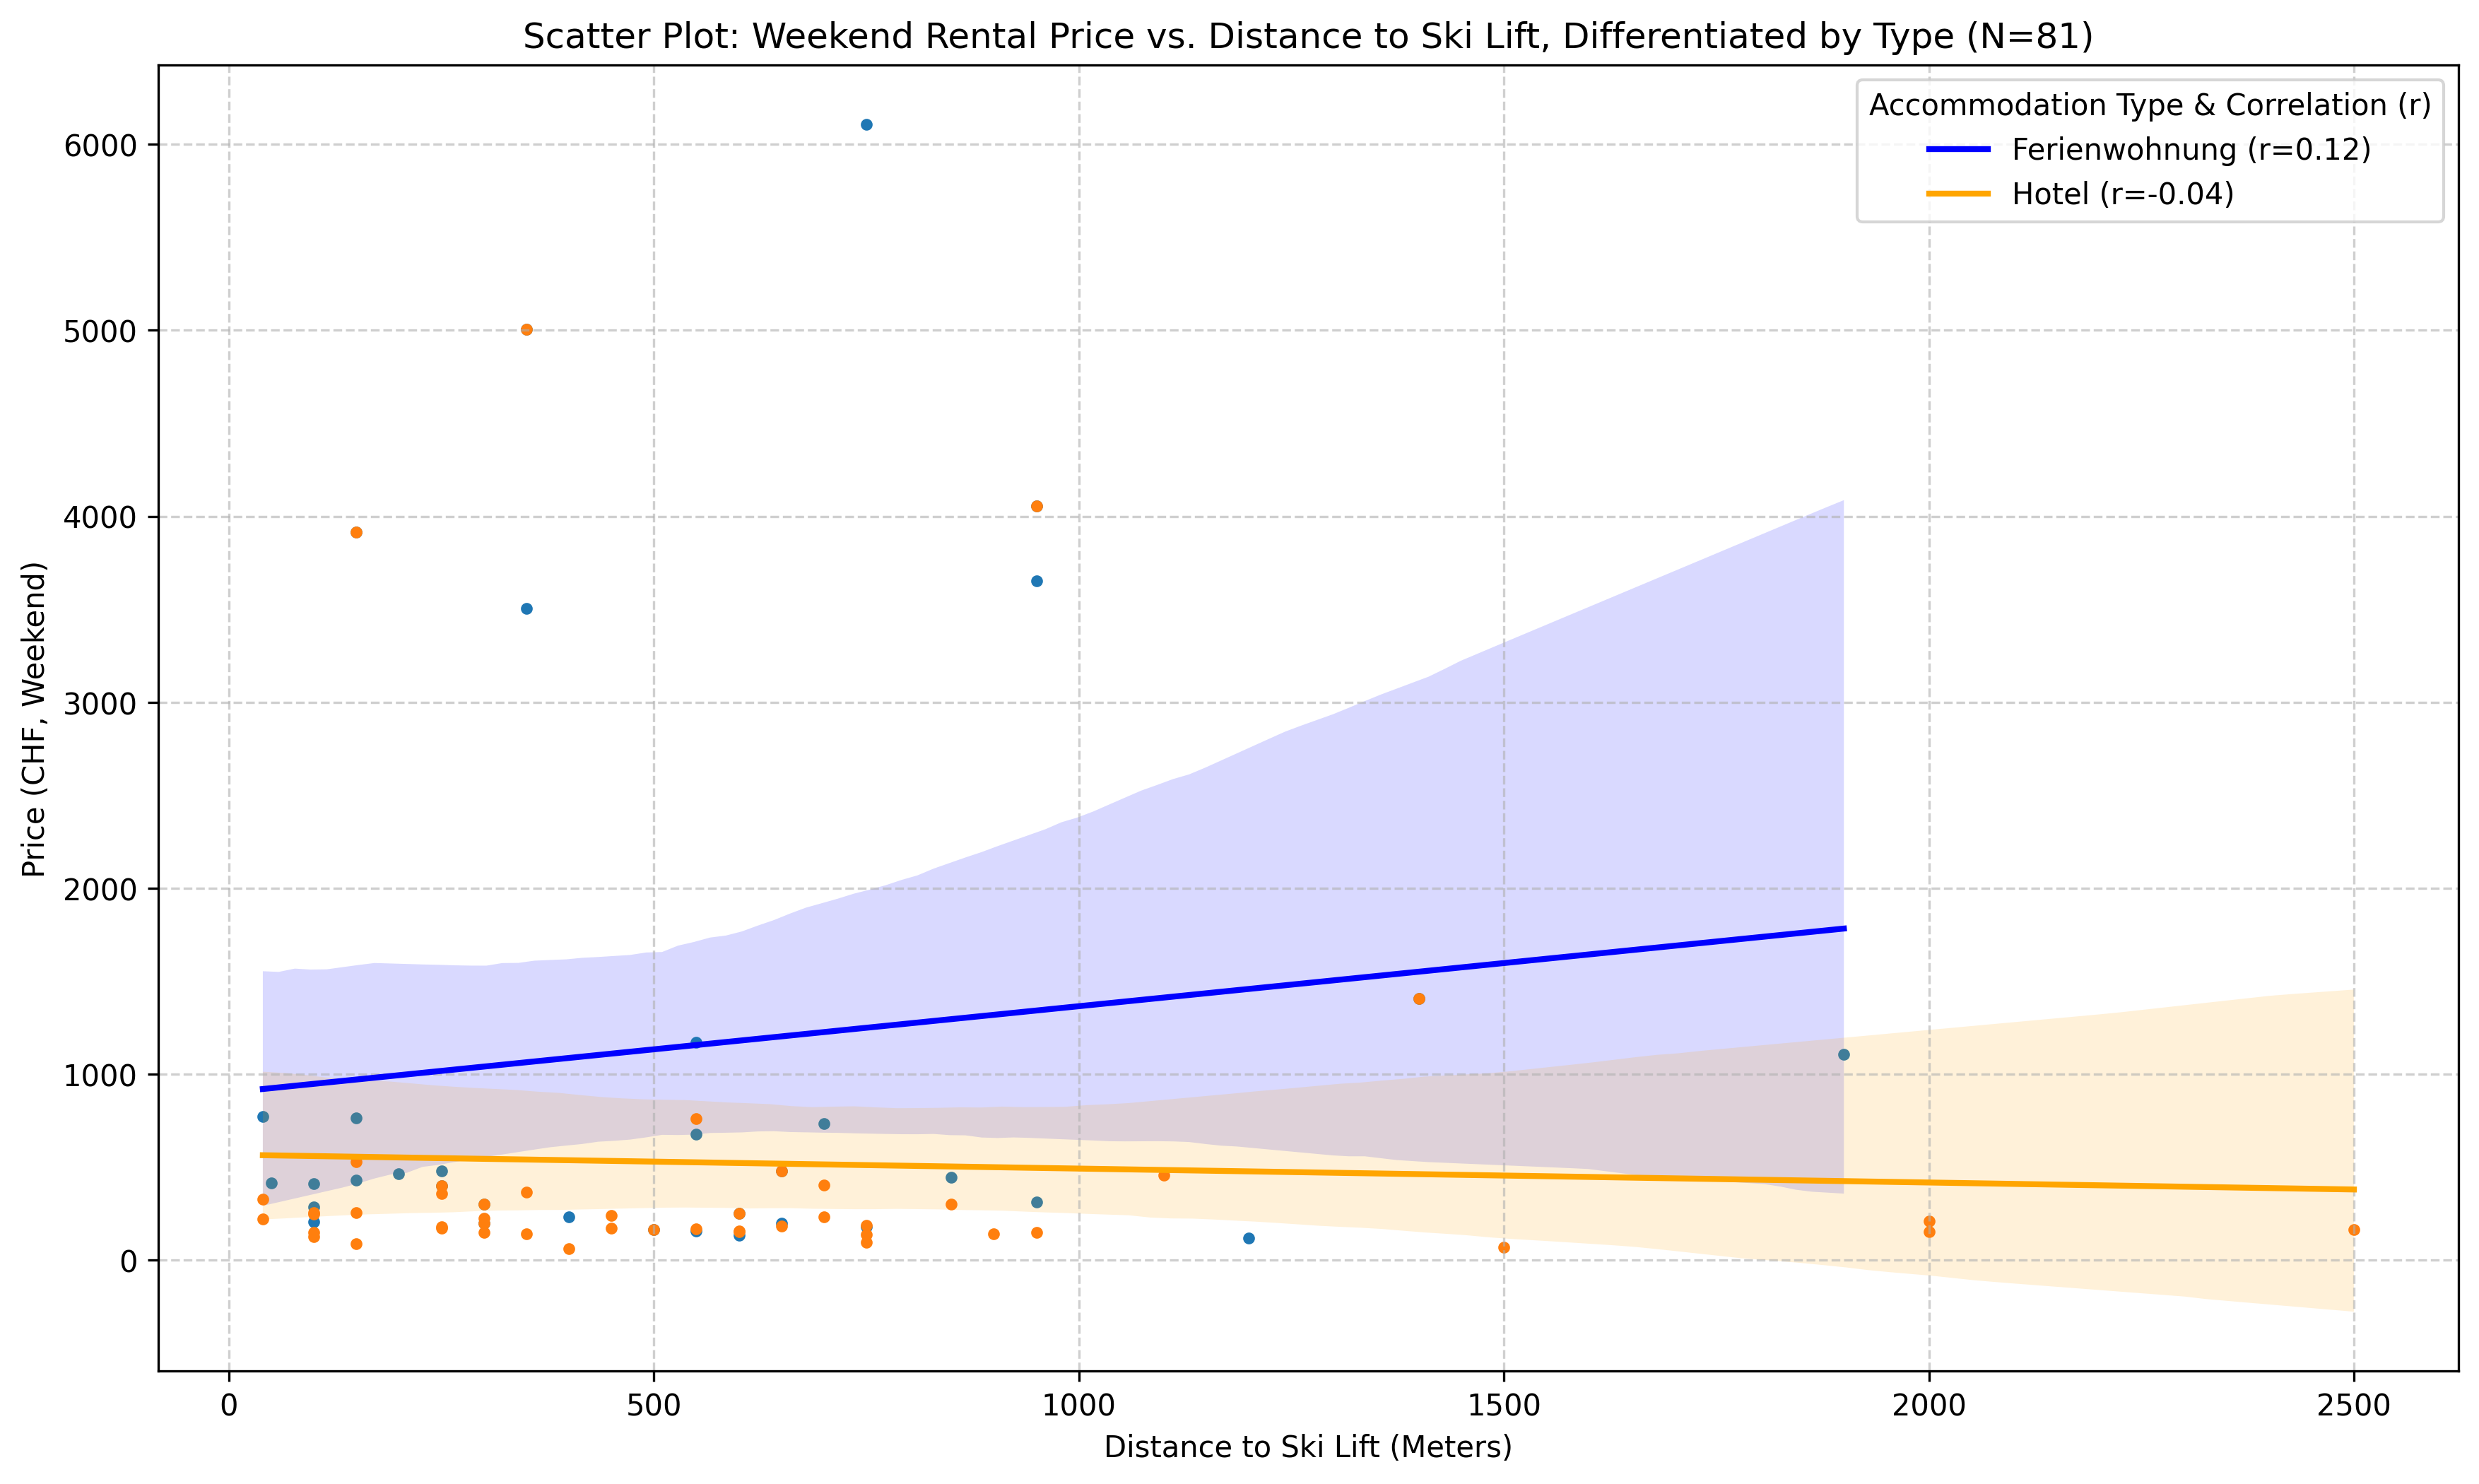

In [120]:
type_colors = {'ferienwohnung': 'blue', 'hotel': 'orange'}
unique_types = df_analysis['type'].unique()

plt.figure(figsize=(14, 8), dpi=300)


#Iterate through the accommodation types to create scatter plots and regression lines
for accommodation_type in unique_types:
    subset = df_analysis[df_analysis['type'] == accommodation_type]
    color = type_colors.get(accommodation_type, 'gray')

    #Calculate Pearson's r for the label
    r_val, p_value = pearsonr(subset['distance_skilift_meters'], subset['price'])

    #Linear Regression Line and Confidence Interval (CI)
    sns.regplot(
            data=subset,
            x='distance_skilift_meters',
            y='price',
            scatter=False,          # Only draw the line and CI
            ci=95,                  # Draw the 95% Confidence Interval
            color=color,
            line_kws={'linestyle': '-', 'linewidth': 2},
            # Label the line/CI for the legend
            label=f"{accommodation_type.capitalize()} (r={r_val:.2f})" 
    )

    plt.scatter(
            subset['distance_skilift_meters'],
            subset['price'],
            # Note: No label here, as the label is provided by the regplot/CI line
            marker='.'
        )

plt.title(f"Scatter Plot: Weekend Rental Price vs. Distance to Ski Lift, Differentiated by Type (N={num_rows})")
plt.xlabel("Distance to Ski Lift (Meters)")
plt.ylabel("Price (CHF, Weekend)")
plt.legend(title='Accommodation Type & Correlation (r)')
plt.grid(True, linestyle='--', alpha=0.6)